In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import seaborn as sns; sns.set()

In [19]:
training_set = pd.read_csv("Google_Stock_Price_Train.csv").iloc[:, 1:2].values
test_set = pd.read_csv("Google_Stock_Price_Test.csv").iloc[:, 1:2].values

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

In [33]:
X_train = []
y_train = []

for i in range(60, len(training_set)):
    X_train.append(training_set[i-60 : i, :])
    y_train.append(training_set[i, :])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
regressor = Sequential()
regressor.add(LSTM(50, return_sequences=True, input_shape=X_train.shape[1:]))
regressor.add(Dropout(.2))
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(.2))
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(.2))
regressor.add(LSTM(50))
regressor.add(Dropout(.2))
regressor.add(Dense(1))

regressor.compile(optimizer="adam", loss="mse")
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0476
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 8s 6ms/step - l

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0017


In [41]:
# This doesn't seem right to me

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

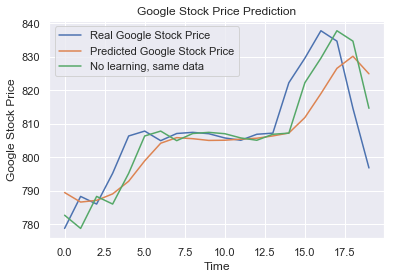

In [52]:
easy_prediction = np.r_['0,2', dataset_train.iloc[:, 1:2].values[-1], real_stock_price[:-1, :]]

plt.plot(real_stock_price, label='Real Google Stock Price')
plt.plot(predicted_stock_price, label='Predicted Google Stock Price')
plt.plot(easy_prediction, label='No learning, same data')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [55]:
# This really doesn't seem right!

print("LTSM mse:", np.sum((real_stock_price - predicted_stock_price)**2) / len(real_stock_price))
print("No Learning, same data mse:", np.sum((real_stock_price - easy_prediction)**2) / len(real_stock_price))

# this is stupid, LTSM loss function was mse.

LTSM mse: 120.94775026966802
No Learning, same data mse: 70.82425499999998
